## PCA
__Principal Component__ Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. 
Each of the principal components is chosen in such a way so that it would describe most of them still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has a maximum variance.

Main disadvantages:
* PCA is that it assumed that the principle componenets are a linear combination of the original features, and if this is not true, PCA will not give any sensible answers where it does an excellent job for datasets, which are linearly sperable.

* Another disadvantage of the classic PCA is concept of Orthogonality, where PCA assumed that the principle componenets are orthogonal to each other.

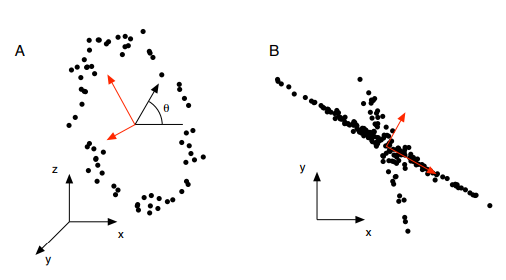

## kPCA

If we use it regular PCA for non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines.



# Importing Libraries

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.utils.extmath import randomized_svd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

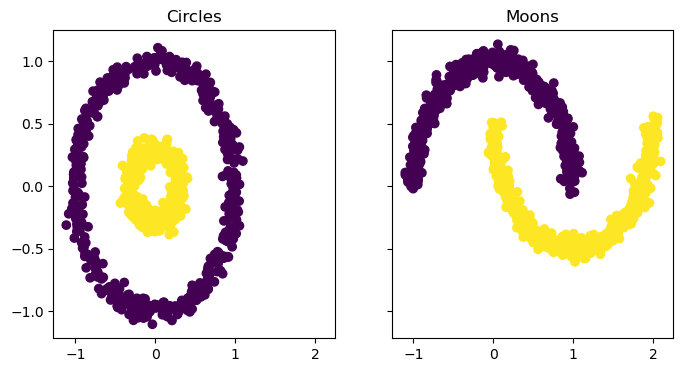

(1000,)
(1000,)


In [3]:
X1, y1 = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=400)

X, y = make_moons(n_samples = 1_000, noise = 0.05, random_state = 400)
  

_, (c, m) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

c.scatter(X1[:, 0], X1[:, 1], c=y1)
c.set_title("Circles")

m.scatter(X[:, 0], X[:, 1], c=y)
_ = m.set_title("Moons")

plt.show()
# print(X1.shape)
# print(X.shape)
print(y1.shape)
print(y.shape)

# PCA

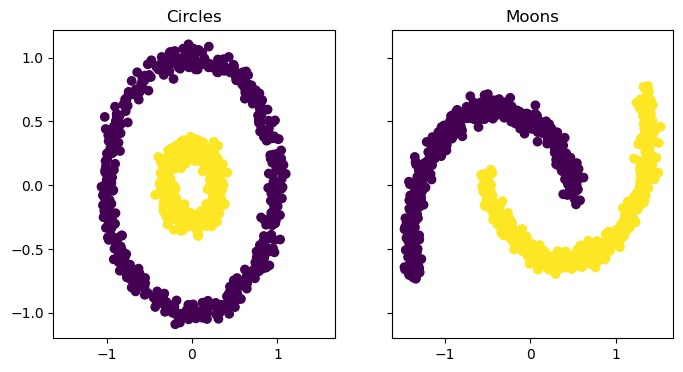

In [4]:
# PCA
pca = PCA(n_components = 2)
X_pca2 = pca.fit_transform(X1)
X_pca1 = pca.fit_transform(X)

   
_, (c, m) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
c.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y1)
c.set_title("Circles")
m.scatter(X_pca1[:, 0], X_pca1[:, 1], c=y)
_ = m.set_title("Moons")

plt.show()

# kPCA

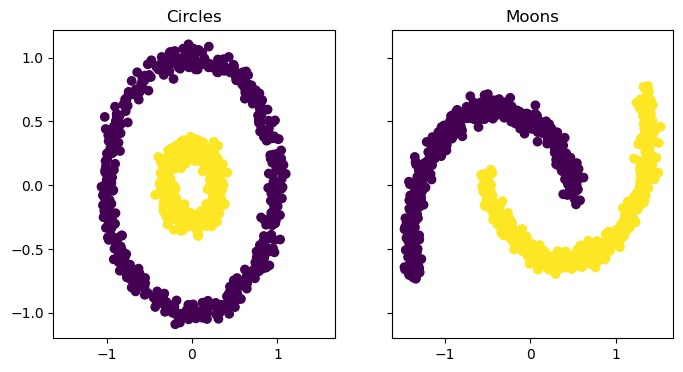

In [5]:
# kPCA
kpca = KernelPCA(kernel ='rbf', gamma = 15)
X_kpca2 = kpca.fit_transform(X1)
X_kpca1 = kpca.fit_transform(X)
  

   
_, (c, m) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
c.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y1)
c.set_title("Circles")

m.scatter(X_pca1[:, 0], X_pca1[:, 1], c=y)
_ = m.set_title("Moons")

plt.show()


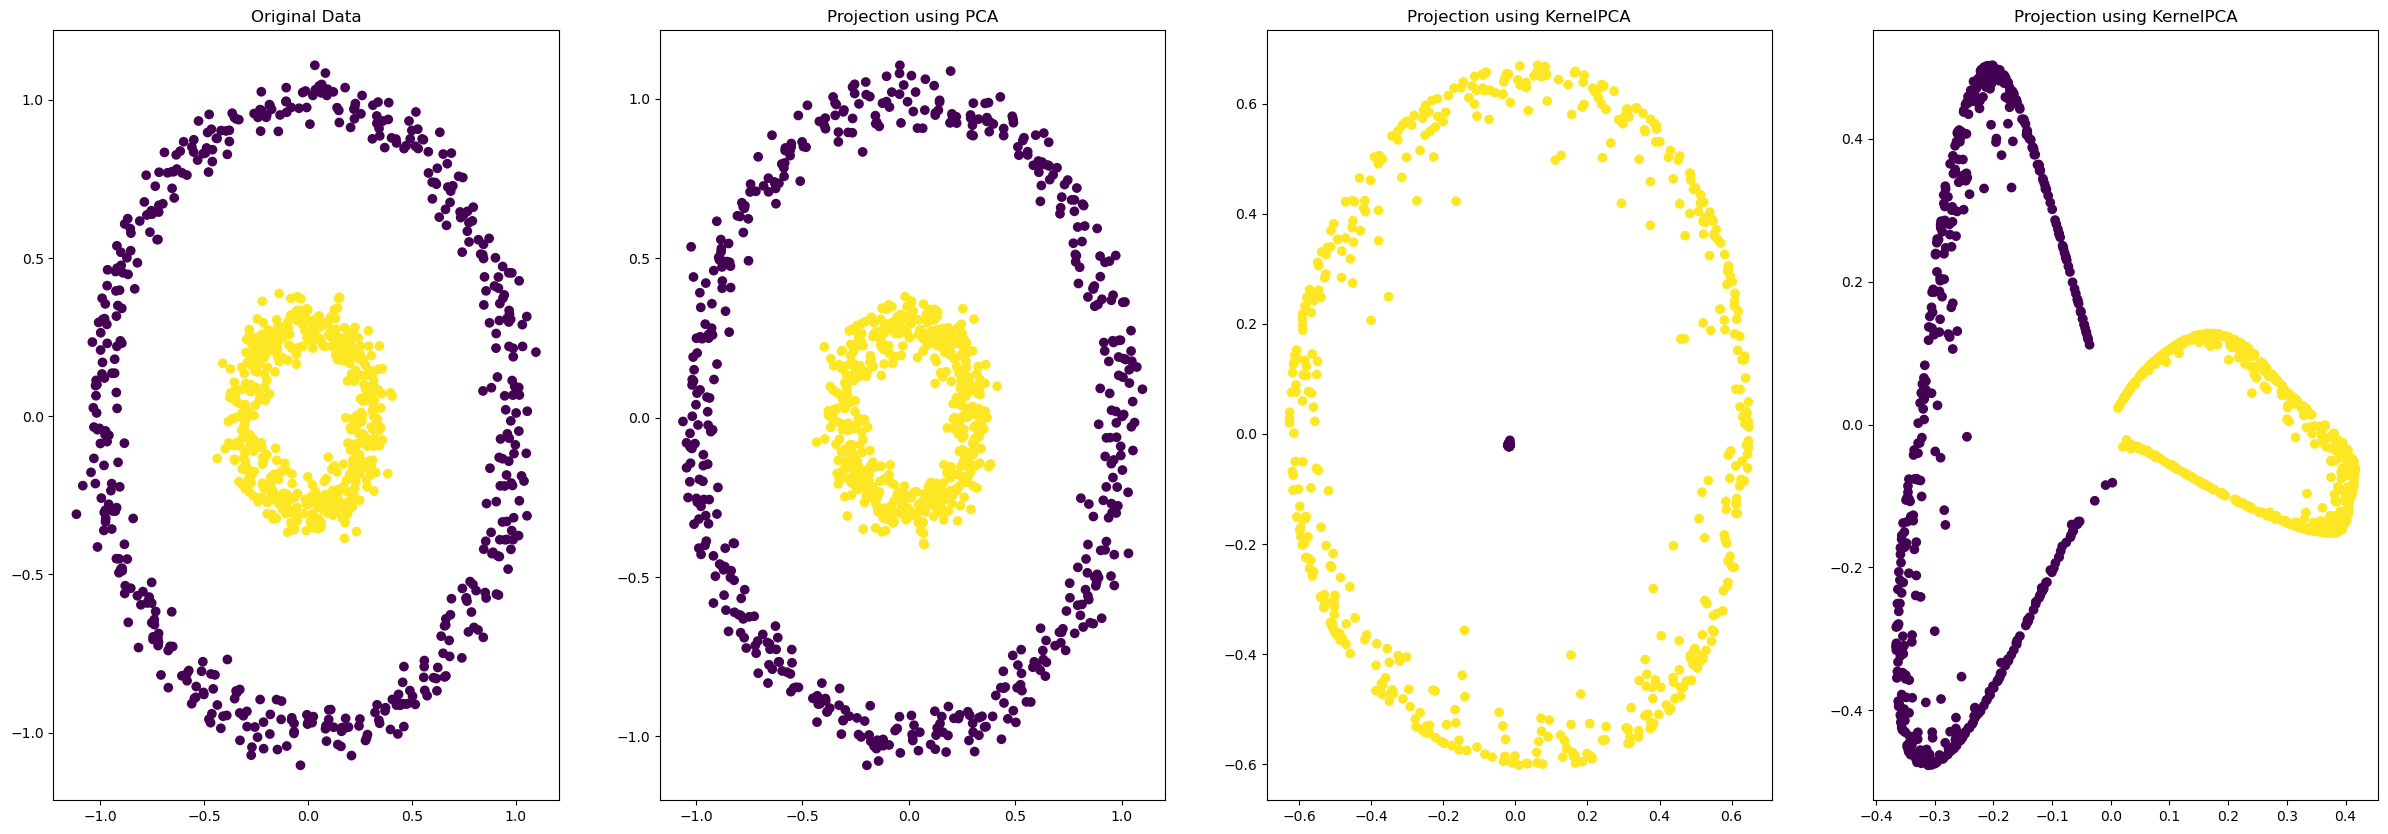

In [6]:
_, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax,zz) = plt.subplots(ncols=4,figsize=(30,10))

orig_data_ax.scatter(X1[:, 0], X1[:, 1], c=y1)
_ = orig_data_ax.set_title("Original Data")

pca_proj_ax.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y1)
_ = pca_proj_ax.set_title("Projection using PCA")

kernel_pca_proj_ax.scatter(X_kpca2[:, 0], X_kpca2[:, 1], c=y1)
_ = kernel_pca_proj_ax.set_title("Projection using KernelPCA")

zz.scatter(X_kpca1[:, 0], X_kpca1[:, 1], c=y1)
_ = zz.set_title("Projection using KernelPCA")

plt.show()

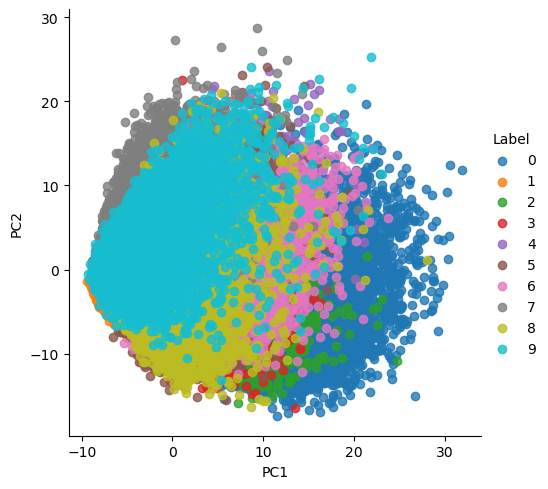

In [15]:
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target
 
#Standardize the data
sc = StandardScaler()
X = sc.fit_transform(X)

def scatter_plot(X_trans, y):
    X_p = pd.DataFrame(data = X_trans, columns=['PC1','PC2'])
    X_p['Label'] = y
    sns.lmplot(x="PC1", y="PC2", hue="Label", data=X_p, fit_reg=False)
    ax = plt.gca()
    plt.show()
    
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
scatter_plot(X_pca, y)

 

## Randomized PCA

This is a PCA extension that makes use of data that has been roughly Singular Value Decomposed (SVD). While the randomised version of PCA operates in O(n*d*2) + O(d3) where d is the number of principle components, conventional PCA operates in O(n*p^2) + O(p^3) where n is the number of data points and p is the number of features. Therefore, it moves extremely quickly when d is significantly smaller than n.
Randomized PCA may be performed using the sklearn.utils.extmath function randomized svd. Three matrices are returned by this method: U, a m x m matrix, Sigma, a m x n diagonal matrix, and VT, the transposed form of a n x n matrix with T as a superscript. Using sklearn.decomposition.PCA in a different approach and switching the svd solver hyperparameter from auto to randomised or full. 
__But if either p or n is greater than 500 or the total number of principle components is less than 80% of p and n, Scikit-learn automatically employs randomised PCA.__

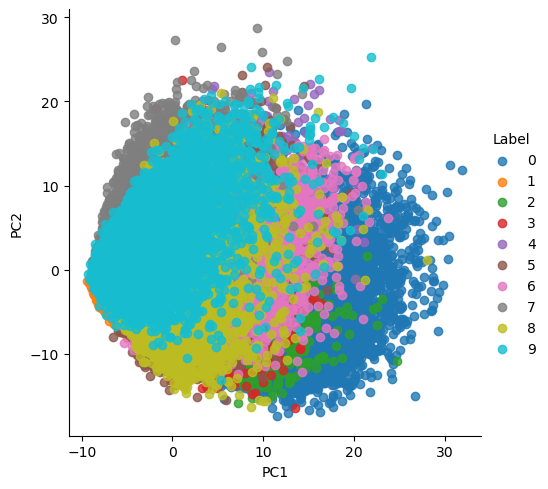

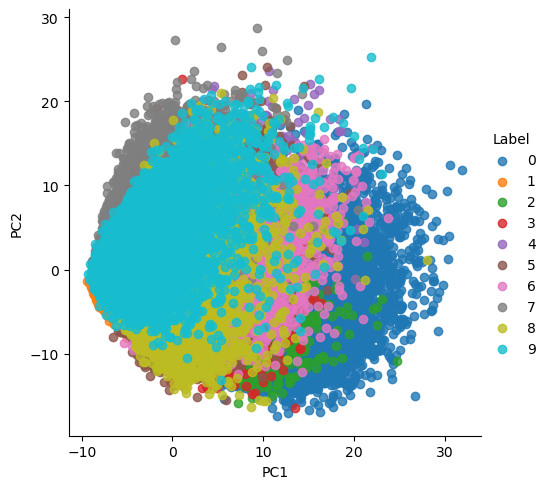

In [13]:
rpca = PCA(n_components=2, svd_solver='randomized')
X_rpca = rpca.fit_transform(X)
 
scatter_plot(X_rpca, y)

## Incremental PCA: 

The major problem with PCA and most of the dimensionality reduction algorithms is that they require whole data to fit in the memory at a single time and as the data is very huge at times thus it becomes very difficult to fit in memory. 
Fortunately, there is an algorithm called Incremental PCA which is useful for large training datasets as it splits the data into min-batches and feeds it to Incremental PCA one batch at a time. This is called as on-the-fly learning. As not much data is present in the memory at a time thus memory usage is controlled.

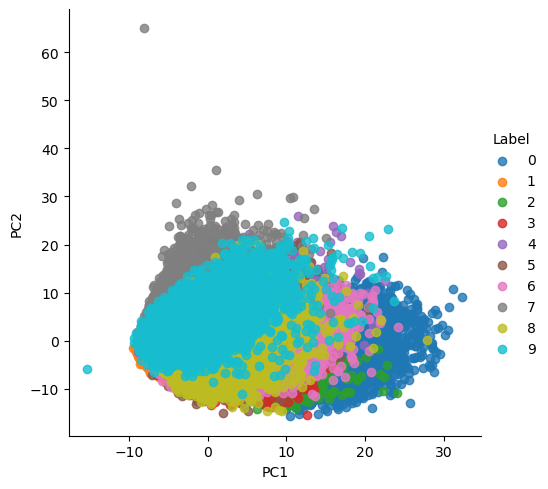

In [14]:
ipca = IncrementalPCA(n_components=2, batch_size=200)
X_ipca = ipca.fit_transform(X)
 
scatter_plot(X_ipca, y)